## MOBILE PRICE CLASSIFICATION 

In this data:
* id:ID
* battery_power:Total energy a battery can store in one time measured in mAh
* blue:Has bluetooth or not
* clock_speed:speed at which microprocessor executes instructions
* dual_sim:Has dual sim support or not
* fc:Front Camera mega pixels
* four_g:Has 4G or not
* int_memory:Internal Memory in Gigabytes
* m_dep:Mobile Depth in cm
* mobile_wt:Weight of mobile phone
* n_cores:Number of cores of processor
* pc:Primary Camera mega pixels
* px_height:Pixel Resolution Height
* px_width:Pixel Resolution Width
* ram:Random Access Memory in Megabytes
* sc_h:Screen Height of mobile in cm
* sc_w:Screen Width of mobile in cm
* talk_time:longest time that a single battery charge will last when you are
* three_g:Has 3G or not
* wifi:Has wifi or not

![Mobile-Phone-Evolution.jpg](attachment:Mobile-Phone-Evolution.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
import io
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("input/train.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [10]:
print(df.columns)
print(df.shape)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
(2000, 21)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no null values in the dataset.

# Data Vizualization
## Correlation

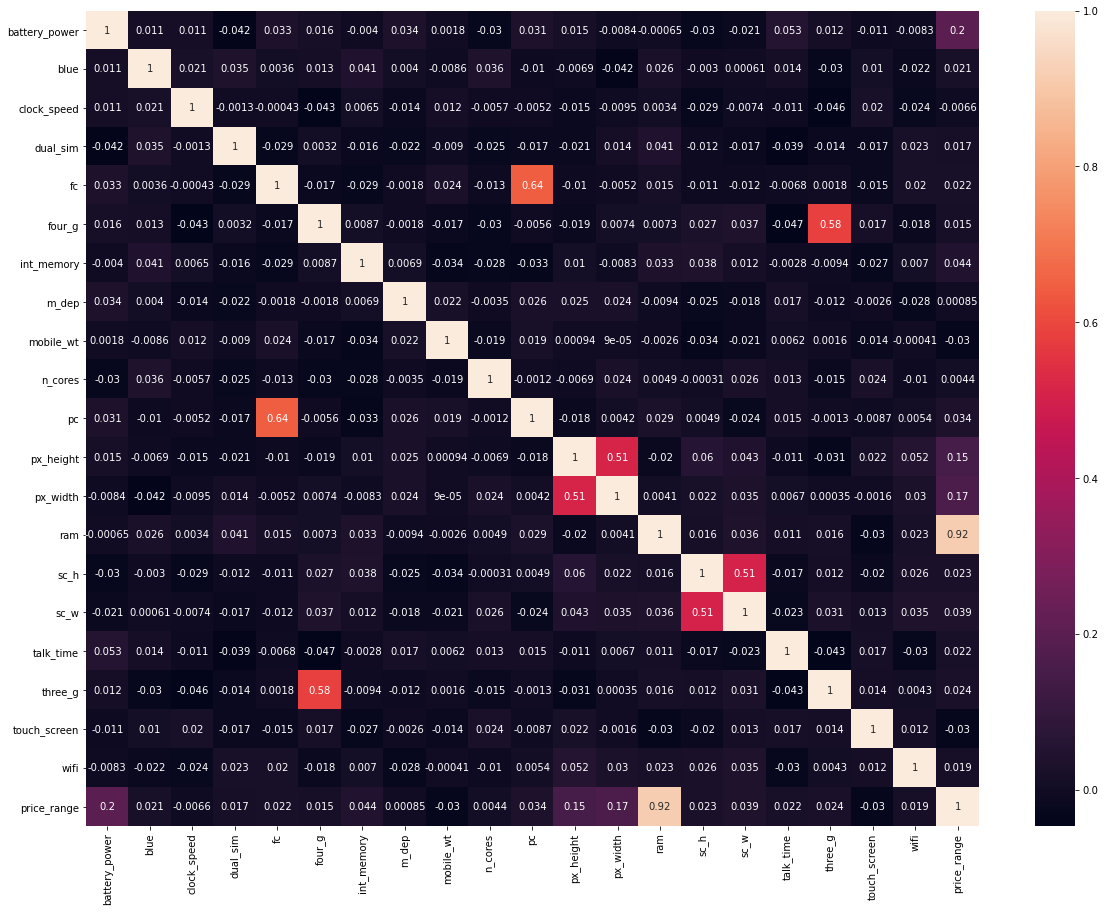

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
g = sns.heatmap(df[top_corr_features].corr(),annot = True)

## RAM (ram)
Random Access Memory

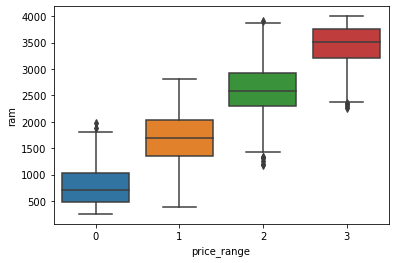

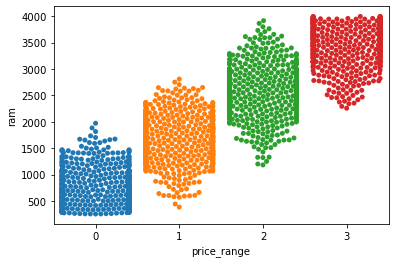

In [14]:
sns.boxplot(df['price_range'],df['ram']);
plt.show()
sns.swarmplot(df['price_range'],df['ram']);

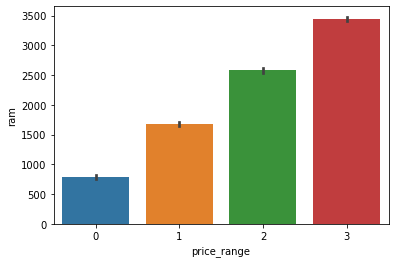

In [15]:
sns.barplot(df['price_range'],df['ram']);

RAM is strongly correlated with price_range which can be visualized in the above plots. The price range increases as the RAM increases. 

## Battery Power (battery_power)
Total energy a battery can store in mAh

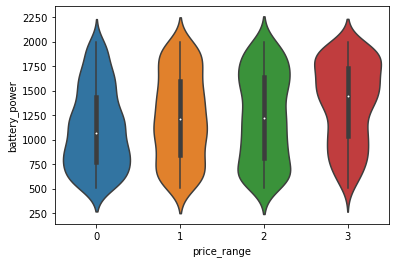

In [16]:
sns.violinplot(df['price_range'],df['battery_power']);

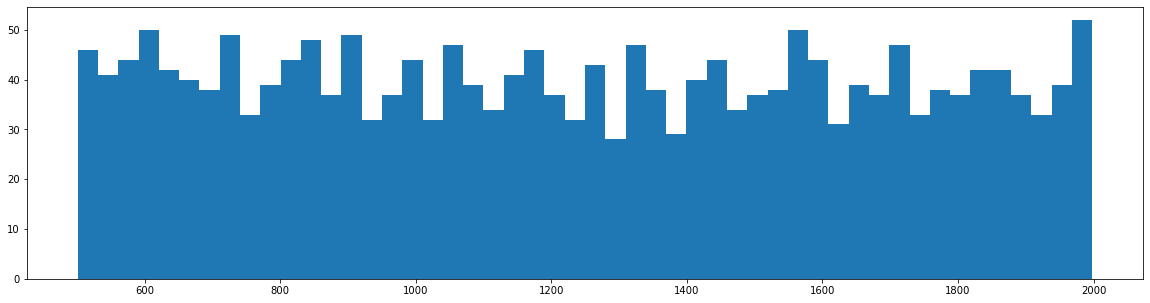

In [17]:
plt.figure(figsize=(20,5))
plt.hist(df['battery_power'],bins=50)
plt.show()

## Pixel Height (px_height) 
Pixel Resolution Height

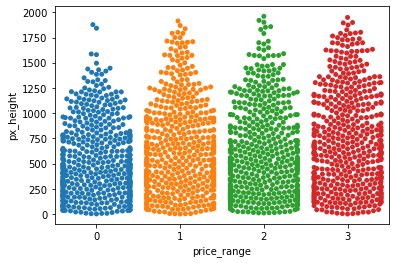

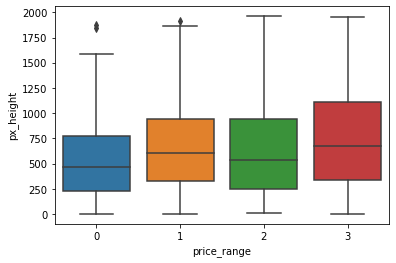

In [19]:
sns.swarmplot(df['price_range'],df['px_height']);
plt.show()
sns.boxplot(df['price_range'],df['px_height']);

## Pixel Width (px_width)
Pixel Resolution Width

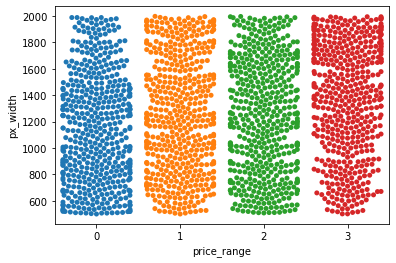

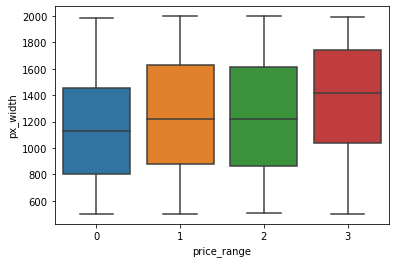

In [21]:
sns.swarmplot(df['price_range'],df['px_width']);
plt.show()
sns.boxplot(df['price_range'],df['px_width']);

## Front Camera (fc)
Front Camera mega pixels

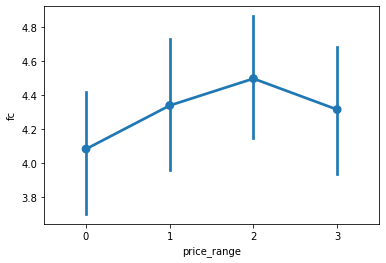

In [22]:
sns.pointplot(df['price_range'],df['fc'])

## Primary Camera (pc)
Primary Camera mega pixels

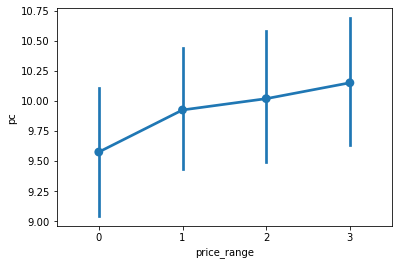

In [24]:
sns.pointplot(df['price_range'],df['pc']);

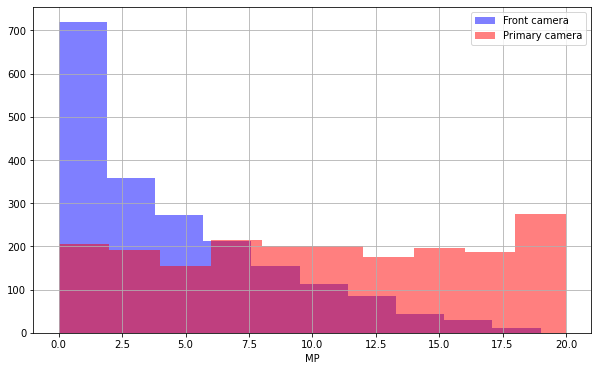

In [25]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MP');

## 4G and 3G Supported (four_g, three_g)
4G and 3G compatibility

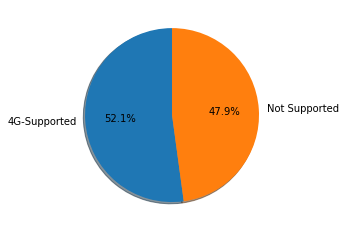

In [26]:
labels_4g = ['4G-Supported','Not Supported']
values_4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

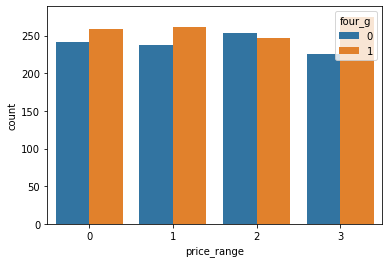

In [27]:
sns.countplot(df['price_range'],hue=df['four_g'])

Mobile phones belonging to price range 3 have more phones compitable to 4G. However, it is very insignificant with the given dataset.

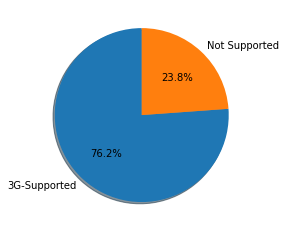

In [28]:
labels_4g = ['3G-Supported','Not Supported']
values_4g = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

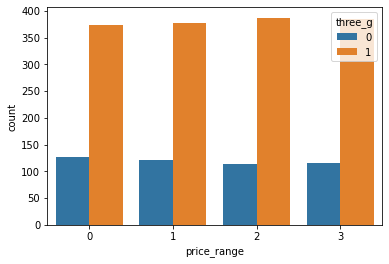

In [29]:
sns.countplot(df['price_range'],hue=df['three_g'])

Most of the phones are 3G compatible in all price ranges.

## Internal Memory (int_memory)
Internal Memory in Gigabytes

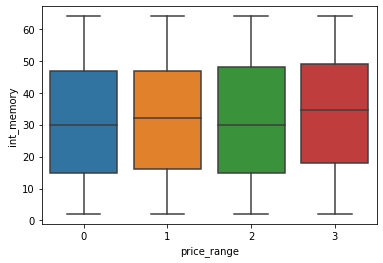

In [32]:
sns.boxplot(df['price_range'],df['int_memory']);

Internal memory does not play a significant role in categorizing price range.

## Screen Height and Screen Width (sc_h, sc_w)
Screen height and screen width in cm

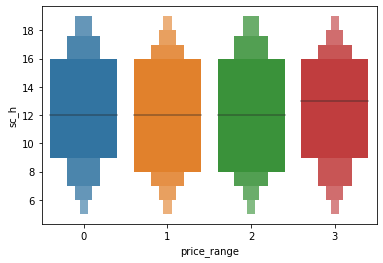

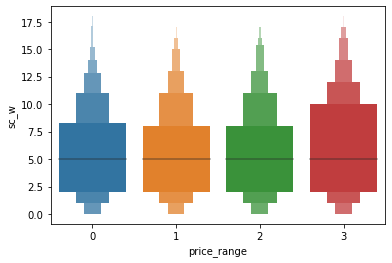

In [33]:
sns.boxenplot(df['price_range'],df['sc_h']);
plt.show()
sns.boxenplot(df['price_range'],df['sc_w']);

It can be noted that phones belonging to price range 3 have more screen height and width. However, the converse need not be true.

## Preprocessing

In [35]:
df = df[~((df['ram'] < 1410) & (df['price_range'] == 2))] #dropping phones less belonging to price range 2 and ram less than 1410 mb. 
df = df[~((df['ram'] > 1650) & (df['price_range'] == 0))] #dropping phones less belonging to price range 0 and ram greater than 1650 mb. 
df = df.drop(columns=(['m_dep'])) #mobile depth doesn't have a role in categorizing price range

df = pd.get_dummies(df, columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']) 
# Creating a dummy variable for the categorical features 

standardScaler = StandardScaler() #scaling down the numeric/continous variables
columns_to_scale = ['battery_power','ram','px_height','px_width','mobile_wt','int_memory','sc_h','sc_w','talk_time','fc','n_cores','pc']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

In [38]:
X=df.drop('price_range',axis=1) #defining X 
y=df['price_range'] #defining y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Model Training: Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1, 
                              max_iter=1000, 
                              penalty='l1',
                              solver='saga')

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid1 = [
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter': [100,1000,2500,5000]
    }
]

rf_Grid1 = GridSearchCV(estimator = logmodel, param_grid = param_grid1, cv = 3, verbose = True, n_jobs = -1)
rf_Grid1.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2764 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3533 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4358 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  9.3min finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                          solver='saga'),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [46]:
rf_Grid1.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga')

In [47]:
logmodel.fit(X_train,y_train)
y_predict = logmodel.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9832214765100671
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.97      0.99      0.98       152
           2       0.98      0.97      0.97       155
           3       0.99      0.99      0.99       141

    accuracy                           0.98       596
   macro avg       0.98      0.98      0.98       596
weighted avg       0.98      0.98      0.98       596



col_0          0    1    2    3
price_range                    
0            146    2    0    0
1              0  151    1    0
2              0    3  150    2
3              0    0    2  139

## Predicting for the test data

In [48]:
url1 = "input/test.csv"
test_df = pd.read_csv(url1) #importing the test file 
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [50]:
test_df1 = test_df.drop('id', axis=1) #id column is removed as we need to predict for this dataset
test_df1 = test_df1.drop(columns=(['m_dep'])) #columns which are not present in train dataset are removed
test_df1 = pd.get_dummies(test_df1, columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']) #dummy values for the columns(same columns as train dataset)

standardScaler = StandardScaler() #standardscaling the columns(same columns as train dataset)
columns_to_scale = ['battery_power','ram','px_height','px_width','mobile_wt','int_memory','sc_h','sc_w','talk_time','fc','n_cores','pc']
test_df1[columns_to_scale] = standardScaler.fit_transform(test_df1[columns_to_scale]) 

test_df1.head(1)

battery_power  clock_speed        fc  int_memory  mobile_wt   n_cores  \
0      -0.475451          1.8  2.108676   -1.581269   1.535535 -0.580671   

         pc  px_height  px_width       ram  ...  dual_sim_0  dual_sim_1  \
0  0.976026   -0.92699  0.391912  1.229373  ...           0           1   

   four_g_0  four_g_1  three_g_0  three_g_1  touch_screen_0  touch_screen_1  \
0         1         0          1          0               0               1   

   wifi_0  wifi_1  
0       1       0  

[1 rows x 25 columns]

In [51]:
Predicted_price = logmodel.predict(test_df1)
Predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [52]:
test_df['predicted_price'] = Predicted_price #adding predicted column to the test dataset
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   
2    0.9        186  ...       1270      1366  2396    17    10         10   
3    0.5         96  ...        295      1752  3893    10     0          7   
4    0.5        108  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  predicted_price  
0        0             1     0                3  
1        1             0     0                3  
2        0             1     1                2  
3        1             1     0                3  
4        1             0     1                1  

[5 rows x 22 columns]

# ----------------------------------------------**----------------------------------------------